# Title

Deep Fake Image and Video Detection using CNN's and RNN's

# Problem Statement

DeepFake is composed from Deep Learning and Fake and means taking one person from an image or video and replacing with someone else likeness using technology such as Deep Artificial Neural Networks. Large companies like Google invest very much in fighting the DeepFake, this including release of large datasets to help training models to counter this threat.The phenomen invades rapidly the film industry and threatens to compromise news agencies. Large digital companies, including content providers and social platforms are in the frontrun of fighting Deep Fakes. GANs that generate DeepFakes becomes better every day and, of course, if you include in a new GAN model all the information we collected until now how to combat various existent models, we create a model that cannot be beatten by the existing ones.

First we will work on detecting faces that were forged and we will work on developing a model to detect videos.

In [15]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

NameError: name 'explanation' is not defined

# Deep Fake Video Classification

## About the dataset

Files

* train_sample_videos.zip - a ZIP file containing a sample set of training videos and a metadata.json with labels. the full set of training videos is available through the links provided above.
* sample_submission.csv - a sample submission file in the correct format.
* test_videos.zip - a zip file containing a small set of videos to be used as a public validation set. To understand the datasets available for this competition, review the Getting Started information.

Metadata Columns

* filename - the filename of the video
* label - whether the video is REAL or FAKE
* original - in the case that a train set video is FAKE, the original video is listed here
* split - this is always equal to "train".

## Importing required libraries

In [2]:
!pip install -U --upgrade tensorflow

     |████████████████████████████████| 458.3MB 27kB/s s eta 0:00:01
     |████████████████████████████████| 61kB 6.3MB/s  eta 0:00:01
     |████████████████████████████████| 4.0MB 30.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.3MB/s  eta 0:00:01
     |████████████████████████████████| 471kB 64.0MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 48.3MB/s eta 0:00:01
     |████████████████████████████████| 4.6MB 26kB/s s eta 0:00:01
     |████████████████████████████████| 5.6MB 47.9MB/s eta 0:00:01
     |████████████████████████████████| 14.8MB 58.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 8.0MB/s  eta 0:00:01
     |████████████████████████████████| 133kB 49.9MB/s eta 0:00:01
     |████████████████████████████████| 4.9MB 48.7MB/s eta 0:00:01
     |████████████████████████████████| 788kB 48.9MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-cp36-none-any.whl size=30705 sha256=cef750dbcb6b98f288f1f2a80c383e61a0104f78f8b420e

In [3]:
pip install tensorflow-docs --no-deps


ERROR: Could not find a version that satisfies the requirement tensorflow-docs (from versions: none)
ERROR: No matching distribution found for tensorflow-docs
Note: you may need to restart the kernel to use updated packages.


In [4]:
# from tensorflow_docs.vis import embed
from tensorflow import keras
#from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

## Data Visualisation

In [5]:
DATA_FOLDER = '../input/deepfake-detection-challenge'
TRAIN_SAMPLE_FOLDER = 'train_sample_videos'
TEST_FOLDER = 'test_videos'

print(f"Train samples: {len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))}")
print(f"Test samples: {len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))}")

Train samples: 401
Test samples: 400


In [6]:
train_sample_metadata = pd.read_json('../input/deepfake-detection-challenge/train_sample_videos/metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


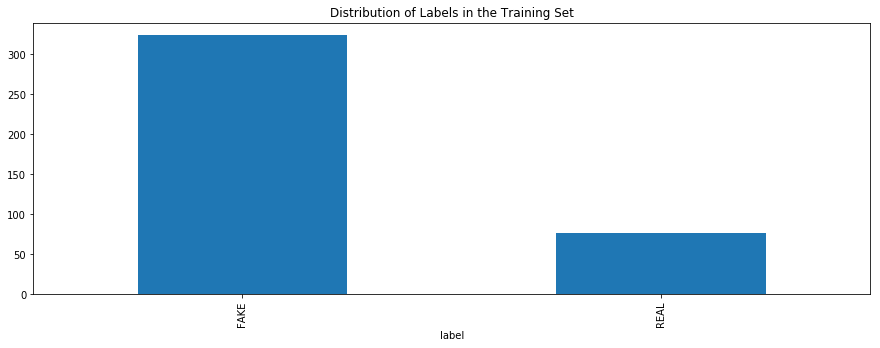

In [7]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [8]:
train_sample_metadata.shape

(400, 3)

Let's visualize now the data.

We select first a list of fake videos.

### Few fake videos

In [9]:
fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].sample(3).index)
fake_train_sample_video

['diuzrpqjli.mp4', 'btjlfpzbdu.mp4', 'ayqvfdhslr.mp4']

In [10]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv2.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

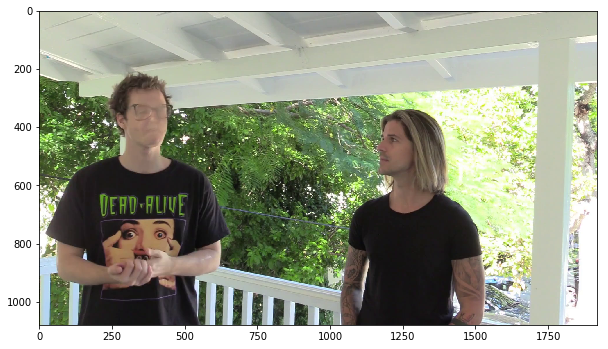

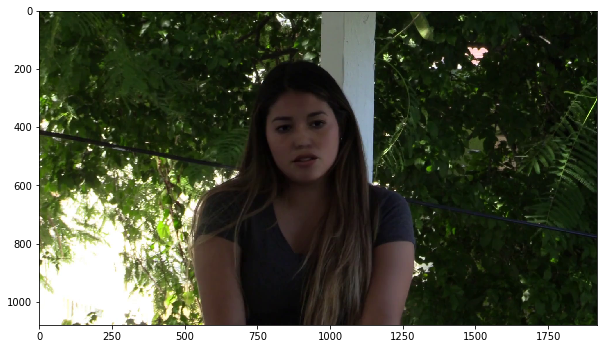

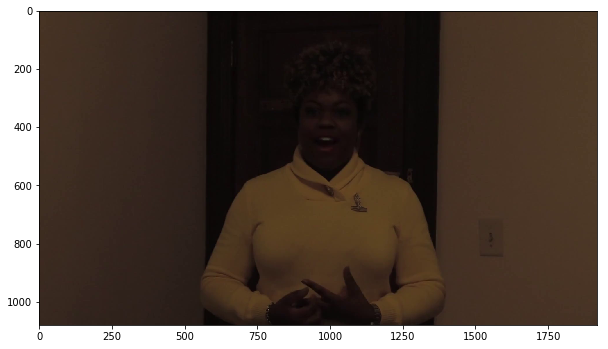

In [11]:
for video_file in fake_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

Let's try now the same for few of the images that are real.

### Few Real Videos

In [12]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='REAL'].sample(3).index)
real_train_sample_video

['cprhtltsjp.mp4', 'eckvhdusax.mp4', 'asaxgevnnp.mp4']

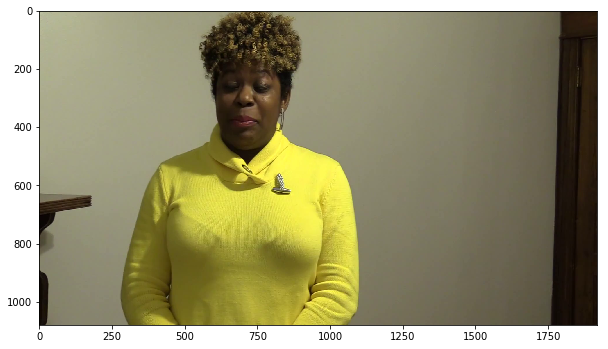

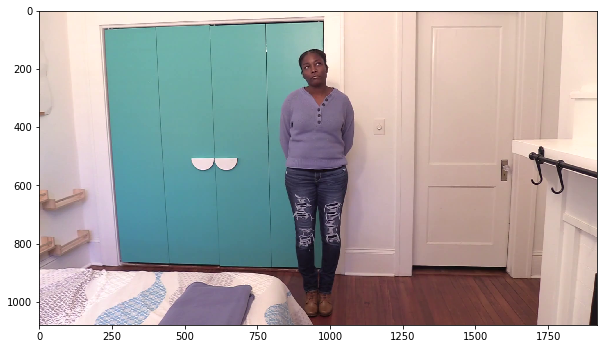

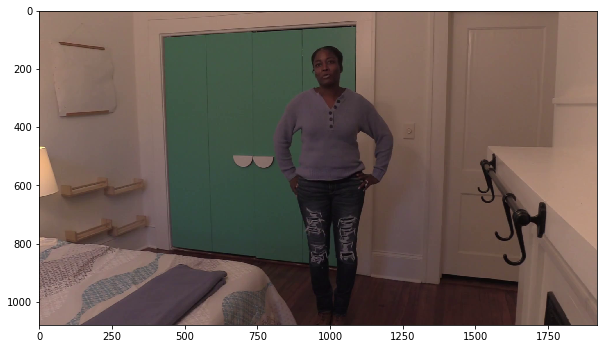

In [13]:
for video_file in real_train_sample_video:
    display_image_from_video(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

### Videos with same original

Let's look now to set of samples with the same original.

In [14]:
train_sample_metadata['original'].value_counts()[0:5]

atvmxvwyns.mp4    6
meawmsgiti.mp4    6
qeumxirsme.mp4    5
kgbkktcjxf.mp4    5
gjypopglvi.mp4    4
Name: original, dtype: int64

We pick one of the originals with largest number of samples.

We also modify our visualization function to work with multiple images.

In [ ]:
def display_image_from_video_list(video_path_list, video_folder=TRAIN_SAMPLE_FOLDER):
    '''
    input: video_path_list - path for video
    process:
    0. for each video in the video path list
        1. perform a video capture from the video
        2. read the image
        3. display the image
    '''
    plt.figure()
    fig, ax = plt.subplots(2,3,figsize=(16,8))
    # we only show images extracted from the first 6 videos
    for i, video_file in enumerate(video_path_list[0:6]):
        video_path = os.path.join(DATA_FOLDER, video_folder,video_file)
        capture_image = cv2.VideoCapture(video_path) 
        ret, frame = capture_image.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax[i//3, i%3].imshow(frame)
        ax[i//3, i%3].set_title(f"Video: {video_file}")
        ax[i//3, i%3].axis('on')


In [ ]:
same_original_fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.original=='atvmxvwyns.mp4'].index)
display_image_from_video_list(same_original_fake_train_sample_video)

### Test video files

Let's also look to few of the test data files.

In [ ]:
test_videos = pd.DataFrame(list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER))), columns=['video'])

In [ ]:
test_videos.head()

Let's visualize now one of the videos.

In [ ]:
display_image_from_video(os.path.join(DATA_FOLDER, TEST_FOLDER, test_videos.iloc[2].video))

### Play video files

Let's look to few fake videos.

In [ ]:
fake_videos = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].index)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play_video(video_file, subset=TRAIN_SAMPLE_FOLDER):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(os.path.join(DATA_FOLDER, subset,video_file),'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

play_video(fake_videos[10])

From visual inspection of these fakes videos, in some cases is very easy to spot the anomalies created when engineering the deep fake, in some cases is more difficult.

## Modelling

### A CNN-RNN Architecture

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

 In this example we will do the following:

* Capture the frames of a video.
* Extract frames from the videos until a maximum frame count is reached.
* In the case, where a video's frame count is lesser than the maximum frame count we will pad the video with zeros.

In [ ]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

We can use a pre-trained network to extract meaningful features from the extracted frames. The Keras Applications module provides a number of state-of-the-art models pre-trained on the ImageNet-1k dataset. We will be using the InceptionV3 model for this purpose.

In [ ]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

Finally, we can put all the pieces together to create our data processing utility.

In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = list(df.index)
    labels = df["label"].values
    labels = np.array(labels=='FAKE').astype(np.int)

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

Since we don't have test labels we split the training data to find its performance in unseen data

In [ ]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(train_sample_metadata,test_size=0.1,random_state=42,stratify=train_sample_metadata['label'])

print(Train_set.shape, Test_set.shape )

In [ ]:
train_data, train_labels = prepare_all_videos(Train_set, "train")
test_data, test_labels = prepare_all_videos(Test_set, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

## The sequence model

Now, we can feed this data to a sequence model consisting of recurrent layers like GRU.

In [ ]:
frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

# Refer to the following tutorial to understand the significance of using `mask`:
# https://keras.io/api/layers/recurrent_layers/gru/
x = keras.layers.GRU(16, return_sequences=True)(
    frame_features_input, mask=mask_input
)
x = keras.layers.GRU(8)(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(8, activation="relu")(x)
output = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model([frame_features_input, mask_input], output)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('./', save_weights_only=True, save_best_only=True)
history = model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_data=([test_data[0], test_data[1]],test_labels),
        callbacks=[checkpoint],
        epochs=EPOCHS,
        batch_size=8
    )

### Inference

In [ ]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask

def sequence_prediction(path):
    frames = load_video(os.path.join(DATA_FOLDER, TEST_FOLDER,path))
    frame_features, frame_mask = prepare_single_video(frames)
    return model.predict([frame_features, frame_mask])[0]
    
# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")


test_video = np.random.choice(test_videos["video"].values.tolist())
print(f"Test video path: {test_video}")

if(sequence_prediction(test_video)>=0.5):
    print(f'The predicted class of the video is FAKE')
else:
    print(f'The predicted class of the video is REAL')

play_video(test_video,TEST_FOLDER)

Here we used simple RNN model feel free to try some complex Attention based and Transformer based models

In [ ]:
import pickle

# 1. Save the trained model
model.save("deepfake_detection_model.h5")

# 2. Package necessary functions and preprocessing steps
functions_and_preprocessing = {
    "load_video": load_video,
    "crop_center_square": crop_center_square,
    "prepare_single_video": prepare_single_video,
    "sequence_prediction": sequence_prediction,
    # Include other necessary functions here
}

# 3. Serialize the model and related components into a pickle file
with open("deepfake_detection_model.pkl", "wb") as f:
    pickle.dump((functions_and_preprocessing, "deepfake_detection_model.h5"), f)

# Conclusion

The deep fake image classifier and deep fake video classifier model gave a generalisation error of around 80%

# Reference and Thanks to 

https://keras.io/examples/vision/video_classification/

https://www.kaggle.com/code/gpreda/deepfake-starter-kit

https://www.kaggle.com/code/robikscube/kaggle-deepfake-detection-introduction

https://www.kaggle.com/code/humananalog/binary-image-classifier-training-demo

https://www.kaggle.com/datasets/dagnelies/deepfake-faces

**Please UPVOTE if you found the notebook useful**